In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [6]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Data Cleaning and Preparation

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
df.duplicated().sum()

3854

In [11]:
df.drop_duplicates( inplace = True)

In [12]:
#for columns in categorical.columns:
    #sns.countplot(categorical[columns])

In [13]:
def sample_diabetes (df, num_samples = 10000, label = 'diabetes', random_state =  101):
    sample_data = []
    unique_labels = df[label].unique()
    for i in unique_labels:
        class_df = df[df[label] == i]
        if len(class_df) > num_samples:
            sampled_class_df = class_df.sample(n = num_samples, random_state = random_state)
        else: 
            sampled_class_df = class_df
        sample_data.append(sampled_class_df)
    balanced_df = pd.concat(sample_data).sample(frac= 1, random_state = random_state).reset_index(drop = True)
    return balanced_df

In [14]:
balanced_df = sample_diabetes(df)

In [15]:
balanced_df.sample(7)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6832,Male,53.0,0,0,No Info,27.32,5.7,140,1
5687,Female,24.0,0,0,never,32.71,6.0,130,0
802,Female,45.0,0,0,No Info,27.32,6.0,126,1
9204,Female,75.0,1,0,No Info,25.37,6.2,155,1
4465,Female,29.0,0,0,never,34.38,4.0,155,0
6845,Female,50.0,0,0,not current,25.32,6.1,200,0
4222,Male,53.0,0,0,current,27.32,6.1,300,1


In [16]:
balanced_df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    3389
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

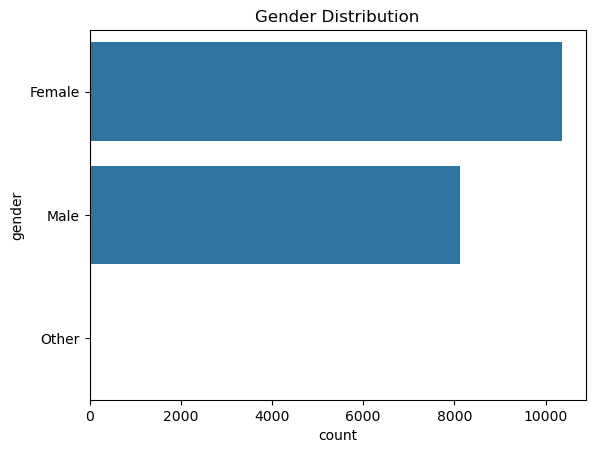

In [17]:
sns.countplot(balanced_df.gender)
plt.title('Gender Distribution')
plt.show()

In [18]:
balanced_df.gender.value_counts()

gender
Female    10356
Male       8124
Other         2
Name: count, dtype: int64

In [19]:
balanced_df = balanced_df[balanced_df.gender != 'Other']

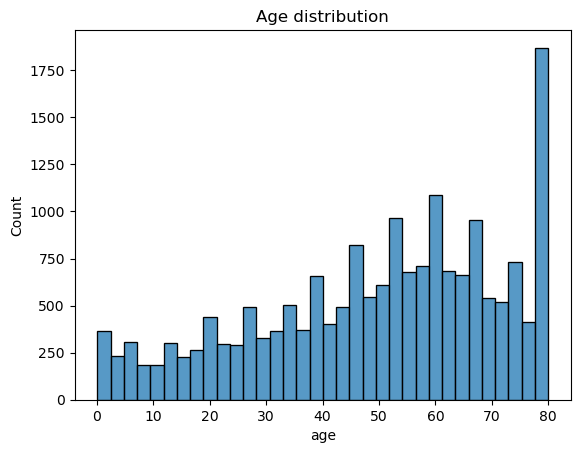

In [20]:
sns.histplot(balanced_df.age)
plt.title('Age distribution')
plt.show()

In [21]:
balanced_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [22]:
balanced_df.hypertension.value_counts()

hypertension
0    15786
1     2694
Name: count, dtype: int64

In [23]:
balanced_df.heart_disease.value_counts()

heart_disease
0    16902
1     1578
Name: count, dtype: int64

In [24]:
balanced_df.smoking_history.value_counts()

smoking_history
never          6912
No Info        5051
former         2467
current        1858
not current    1318
ever            874
Name: count, dtype: int64

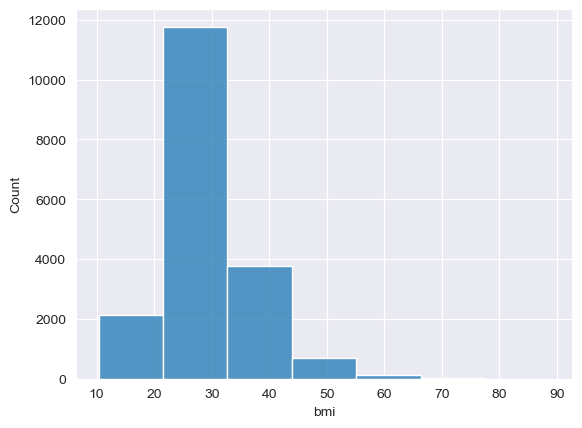

In [25]:
sns.set_style('darkgrid')
sns.histplot(balanced_df.bmi, bins =7)
plt.show()

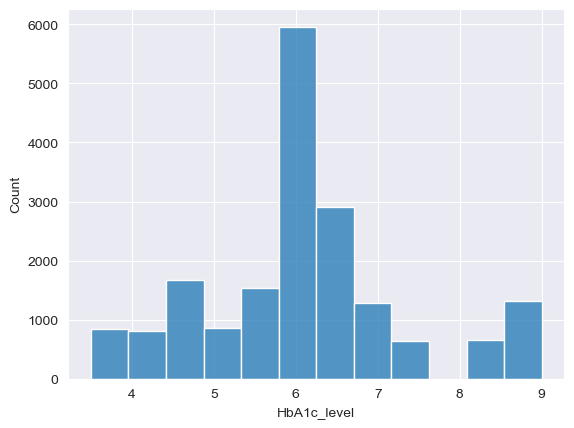

In [26]:
sns.set_style('darkgrid')
sns.histplot(balanced_df.HbA1c_level, bins = 12)
plt.show()

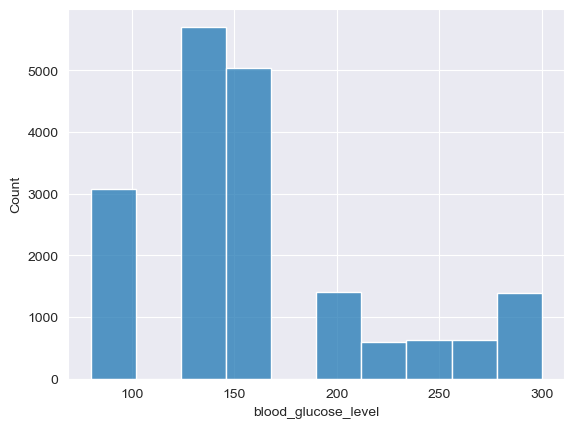

In [27]:
sns.histplot(balanced_df.blood_glucose_level, bins = 10)
plt.show()

In [28]:
balanced_df.diabetes.value_counts()

diabetes
0    9998
1    8482
Name: count, dtype: int64

### Finding the Features of a diabetic Patient

In [29]:
diabetic_df = balanced_df[balanced_df['diabetes']== 1]

In [30]:
diabetic_df = diabetic_df[diabetic_df['age'] > 1]

In [31]:
diabetic_df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2834,Female,80.0,1,1,never,22.67,7.5,160,1
15578,Male,68.0,0,1,ever,24.90,6.5,159,1
15596,Male,61.0,0,0,former,30.02,9.0,159,1
13751,Male,80.0,0,1,not current,27.32,5.8,260,1
16207,Female,51.0,0,0,never,27.32,8.8,140,1


In [32]:
diabetic_df.bmi.dtype

dtype('float64')

In [33]:
diabetic_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.0
mean,60.925961,0.245933,0.149375,31.997755,6.934827,194.026173,1.0
std,14.545301,0.430664,0.356479,7.563494,1.076462,58.630047,0.0
min,3.000000,0.000000,0.000000,10.980000,5.700000,126.000000,1.0
25%,52.000000,0.000000,0.000000,27.320000,6.100000,145.000000,1.0
50%,62.000000,0.000000,0.000000,29.985000,6.600000,160.000000,1.0
75%,72.000000,0.000000,0.000000,35.940000,7.500000,240.000000,1.0
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.0


In [34]:
for col in diabetic_df.columns:
    if diabetic_df[col].dtype == float or col == 'blood_glucose_level':
        continue
    display(diabetic_df[col].value_counts().reset_index())
    print()

,gender,count
0,Female,4447
1,Male,4035


,hypertension,count
0,0,6396
1,1,2086


,heart_disease,count
0,0,7215
1,1,1267


,smoking_history,count
0,never,3337
1,former,1590
2,No Info,1445
3,current,948
4,not current,690
5,ever,472


,diabetes,count
0,1,8482


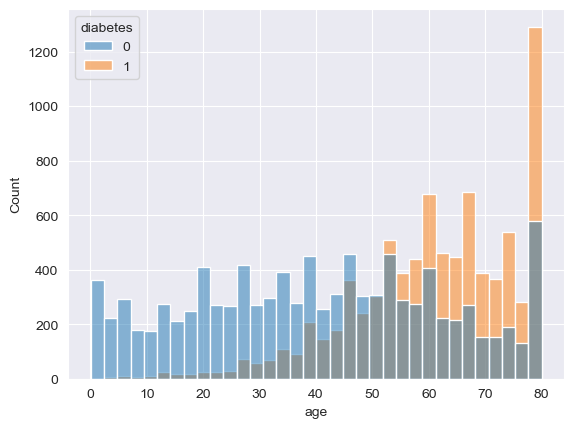

In [35]:
sns.histplot(x = 'age', data = balanced_df, hue = 'diabetes')
plt.show()

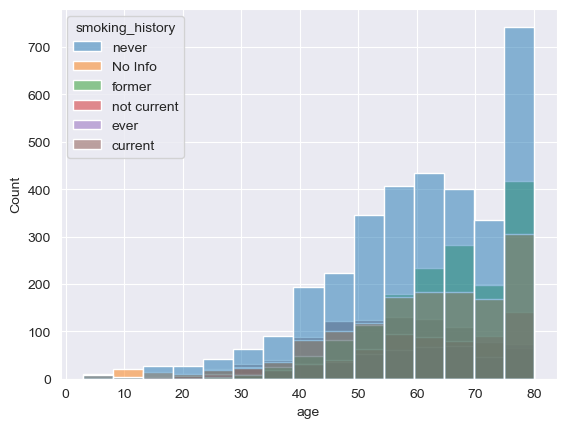

In [36]:
sns.histplot(x = 'age', data = diabetic_df, hue ='smoking_history', bins = 15)
plt.show()

In [37]:
diabetic_df.sample(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
4783,Male,80.0,0,0,No Info,27.32,7.0,159,1
11059,Female,80.0,1,0,never,34.13,6.8,140,1
4492,Female,50.0,0,0,current,40.93,6.2,160,1


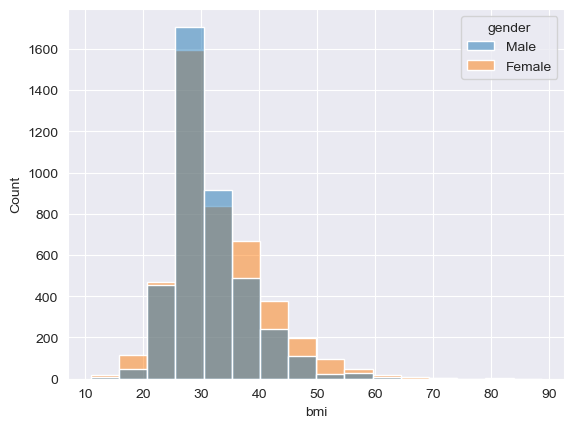

In [38]:
sns.histplot(x ='bmi', data = diabetic_df, hue ='gender', bins = 16)
plt.show()

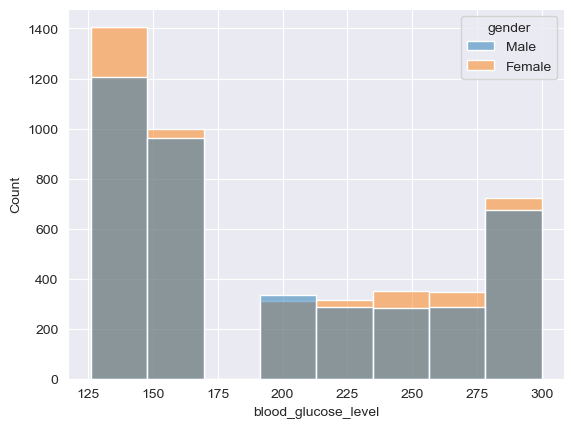

In [39]:
sns.histplot(x ='blood_glucose_level', data = diabetic_df, hue ='gender', bins = 8)
plt.show()

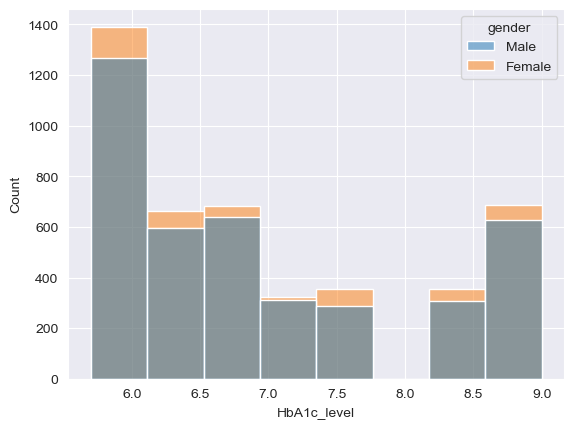

In [40]:
sns.histplot(x ='HbA1c_level', data = diabetic_df, hue ='gender', bins = 8)
plt.show()

In [41]:
diabetic_df.groupby('gender')['HbA1c_level'].max()

gender
Female    9.0
Male      9.0
Name: HbA1c_level, dtype: float64

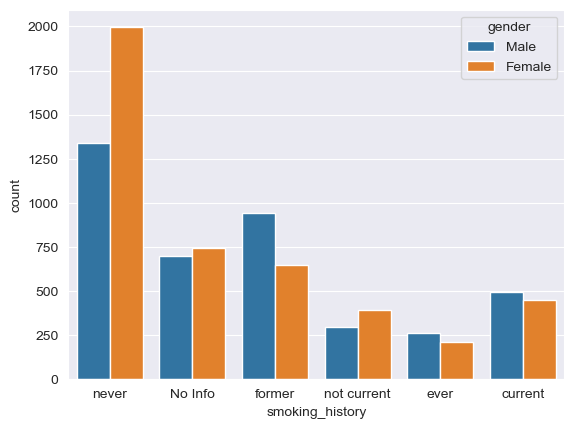

In [42]:
sns.countplot(x= 'smoking_history',data = diabetic_df, hue ='gender')
plt.show()

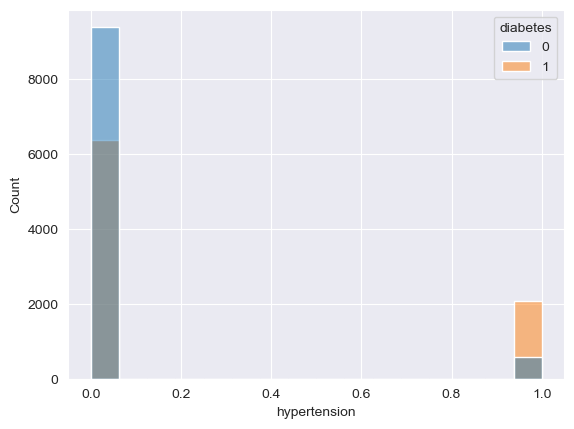

In [43]:
sns.histplot(x = 'hypertension', data = balanced_df , hue = 'diabetes')
plt.show()

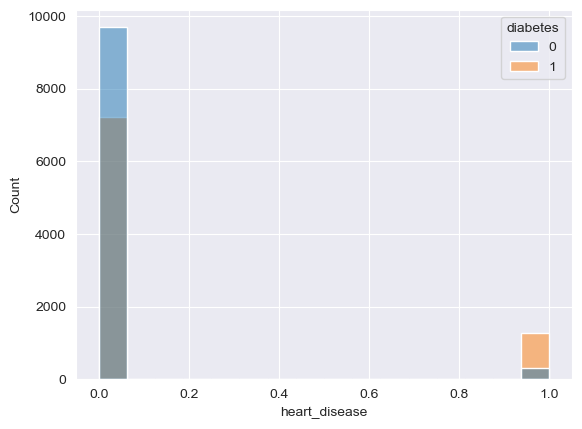

In [44]:
sns.histplot(x = 'heart_disease', data = balanced_df , hue = 'diabetes')
plt.show()

In [45]:
diabetic_df.sample(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
242,Male,80.0,0,0,never,37.08,5.7,159,1
16624,Male,62.0,0,0,not current,27.32,6.8,155,1


In [46]:
diabetic_df.groupby('smoking_history')['blood_glucose_level'].mean().sort_values(ascending= False)

smoking_history
current        196.966245
No Info        196.244291
not current    195.866667
former         193.476730
never          192.805214
ever           189.122881
Name: blood_glucose_level, dtype: float64

In [47]:
balanced_df.gender.value_counts()

gender
Female    10356
Male       8124
Name: count, dtype: int64

### Encoding the Categorical columns

In [48]:
balanced_df.sample(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
10010,Male,52.0,0,0,never,30.41,7.0,220,1
592,Female,62.0,0,0,never,21.12,5.0,126,0
101,Male,35.0,0,0,not current,27.32,5.8,158,0


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
gender_enc = LabelEncoder()

In [51]:
balanced_df['gender']= gender_enc.fit_transform(balanced_df['gender'])

In [52]:
balanced_df.smoking_history.unique()

array(['never', 'No Info', 'not current', 'current', 'ever', 'former'],
      dtype=object)

In [53]:
smoking_history_dict = {'No Info': 0,'never':1, 'not current':2, 'former':3, 'current':4, 'ever': 6 }

In [54]:
balanced_df['smoking_history'] = balanced_df['smoking_history'].map(smoking_history_dict)

### Bivariate Analysis

In [55]:
balanced_df.corr('spearman')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.020806,0.014734,0.095694,0.047405,-0.003458,0.040681,0.038856,0.066997
age,0.020806,1.000000,0.258948,0.272370,0.212173,0.243520,0.273028,0.244983,0.469498
hypertension,0.014734,0.258948,1.000000,0.100393,0.113770,0.163206,0.162821,0.131063,0.261412
heart_disease,0.095694,0.272370,0.100393,1.000000,0.095388,0.070322,0.125388,0.108045,0.210889
smoking_history,0.047405,0.212173,0.113770,0.095388,1.000000,0.191982,0.120364,0.097206,0.207104
bmi,-0.003458,0.243520,0.163206,0.070322,0.191982,1.000000,0.193597,0.174241,0.349636
HbA1c_level,0.040681,0.273028,0.162821,0.125388,0.120364,0.193597,1.000000,0.294382,0.591701
blood_glucose_level,0.038856,0.244983,0.131063,0.108045,0.097206,0.174241,0.294382,1.000000,0.489840
diabetes,0.066997,0.469498,0.261412,0.210889,0.207104,0.349636,0.591701,0.489840,1.000000


### Model Training

In [56]:
X = balanced_df.drop(columns = ['diabetes'])

In [57]:
Y = balanced_df.diabetes

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state =101)

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, auc, roc_curve

In [62]:
lr_model = LogisticRegression(max_iter= 1000, solver = 'lbfgs', random_state = 12)

In [63]:
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=12)

In [64]:
lr_y_pred = lr_model.predict(X_test)

In [65]:
confusion_matrix(Y_test, lr_y_pred)

array([[2282,  234],
       [ 303, 1801]], dtype=int64)

In [66]:
print(classification_report(Y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2516
           1       0.89      0.86      0.87      2104

    accuracy                           0.88      4620
   macro avg       0.88      0.88      0.88      4620
weighted avg       0.88      0.88      0.88      4620



### Support Vector Classifier

In [67]:
#from sklearn.svm import SVC

In [68]:
#svc_model = SVC(kernel ='linear', C= 10000)

In [69]:
#svc_model.fit(X_train, Y_train)

In [70]:
#svc_y_pred = svc_model.predict(X_test)

In [71]:
#confusion_matrix(Y_test, svc_y_pred)

In [72]:
#print(classification_report(Y_test, svc_y_pred))

### Random Forest classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf_model = RandomForestClassifier(n_estimators = 300 ,random_state = 101 )

In [75]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=300, random_state=101)

### Viewing Feature Importance

In [76]:
featureimportance = rf_model.feature_importances_

In [77]:
features = pd.DataFrame(index = X_train.columns, data = featureimportance)

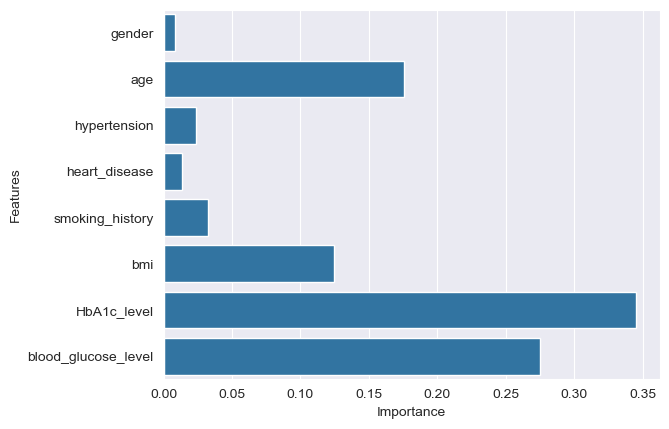

In [78]:
sns.barplot(x= 0 , y= features.index, data = features)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [79]:
prob = rf_model.predict_proba(X_test)[:,1]

In [80]:
pd.DataFrame(prob).sample(5)

,0
2948,0.040000
3469,0.003333
3073,0.260000
2502,0.000000
3596,0.000000


In [81]:
auc = roc_auc_score(Y_test, prob)

In [82]:
fpr, tpr,thresholds = roc_curve(Y_test, prob)

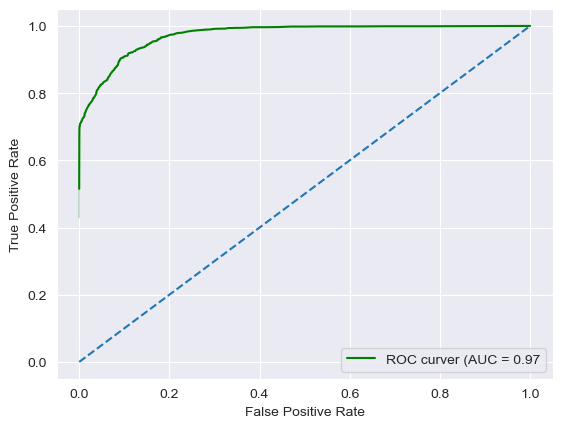

In [83]:
sns.set_style('darkgrid')
sns.lineplot( color = 'green',x = fpr, y = tpr, label = f'ROC curver (AUC = {auc:.2f}',)
plt.plot([0,1], [0,1], linestyle = 'dashed' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [84]:
from sklearn.metrics import roc_curve

In [85]:
TPR,FPR,AUC = roc_curve(Y_test, prob)

In [86]:
pd.DataFrame(TPR)

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
331,0.575517
332,0.623609
333,0.680445
334,0.781399


In [87]:
rf_y_pred = rf_model.predict(X_test)

In [88]:
print(confusion_matrix(Y_test, rf_y_pred))

[[2290  226]
 [ 217 1887]]


In [89]:
print(classification_report(Y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2516
           1       0.89      0.90      0.89      2104

    accuracy                           0.90      4620
   macro avg       0.90      0.90      0.90      4620
weighted avg       0.90      0.90      0.90      4620



In [90]:
TP = confusion_matrix(Y_test, rf_y_pred)[0,0]
TN = confusion_matrix(Y_test, rf_y_pred)[1,1]
FP = confusion_matrix(Y_test, rf_y_pred)[0,1]
FN =confusion_matrix(Y_test, rf_y_pred)[1,0]

In [91]:
classification_error = (FN+FP)/(TP+TN+FP+FN)

In [92]:
classification_error

0.09588744588744588

### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
dt_model = DecisionTreeClassifier(max_depth = 30, random_state = 101)

In [95]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=30, random_state=101)

In [96]:
dt_y_pred = dt_model.predict(X_test)

In [97]:
print(classification_report(Y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2516
           1       0.87      0.86      0.87      2104

    accuracy                           0.88      4620
   macro avg       0.88      0.88      0.88      4620
weighted avg       0.88      0.88      0.88      4620



In [98]:
import joblib

In [99]:
#joblib.dump(rf_model,'Diabetes_prediction_model.pk1')

In [100]:
model = RandomForestClassifier(max_features = 'log2', min_samples_leaf = 10, min_samples_split = 8)

In [101]:
model.fit(X_train,Y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=10,
                       min_samples_split=8)

In [102]:
pred = model.predict(X_test)

In [103]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2516
           1       0.89      0.90      0.90      2104

    accuracy                           0.91      4620
   macro avg       0.90      0.90      0.90      4620
weighted avg       0.91      0.91      0.91      4620



In [124]:
balanced_df.

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       18472, 18473, 18474, 18475, 18476, 18477, 18478, 18479, 18480, 18481],
      dtype='int64', length=18480)